<a href="https://colab.research.google.com/github/B-pallavi123/ML-AI-DS/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv('train.csv')
train_df=pd.DataFrame(train)

In [ ]:
test=pd.read_csv('test.csv')
test_df=pd.DataFrame(test)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

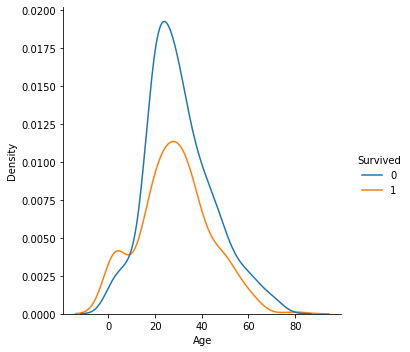

In [ ]:
sns.displot(data=train,x='Age',hue='Survived',kind='kde')
plt.show()

In [ ]:
#Treatment of missing values

In [ ]:
missing_list=list(train.isnull().sum()[train.isnull().sum() > 0].index)

In [ ]:
missing_list

['Age', 'Cabin', 'Embarked']

In [ ]:
#let's replace age with median
median=train['Age'].median()
train['Age'].fillna(median, inplace=True)
test['Age'].fillna(median, inplace=True)


#let's replace embarked with mode
mode=train['Embarked'].mode()[0]
train['Embarked'].fillna(mode, inplace=True)
test['Embarked'].fillna(mode, inplace=True)

train_df.drop(['Cabin'],axis=1,inplace=True)







In [ ]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
test_df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
test_df['Fare'].nunique()

169

In [ ]:

test_df.dropna(inplace=True)


In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#converting my object data types (sex,embarked) into int

In [ ]:
mapping_dict_1={'male':0,'female':1}
mapping_dict_2={'C':2,'Q':3,'S':4}

In [ ]:
train_df['Sex']=train_df['Sex'].map(mapping_dict_1)
train_df['Embarked']=train_df['Embarked'].map(mapping_dict_2)

In [ ]:
train_df.value_counts()

PassengerId  Survived  Pclass  Name                                      Sex  Age   SibSp  Parch  Ticket      Fare    Embarked
1            0         3       Braund, Mr. Owen Harris                   0    22.0  1      0      A/5 21171   7.250   4           1
599          0         3       Boulos, Mr. Hanna                         0    28.0  0      0      2664        7.225   2           1
588          1         1       Frolicher-Stehli, Mr. Maxmillian          0    60.0  1      1      13567       79.200  2           1
589          0         3       Gilinski, Mr. Eliezer                     0    22.0  0      0      14973       8.050   4           1
590          0         3       Murdlin, Mr. Joseph                       0    28.0  0      0      A./5. 3235  8.050   4           1
                                                                                                                                 ..
301          1         3       Kelly, Miss. Anna Katherine "Annie Kate"  1    28.

In [ ]:
test_df['Sex']=test_df['Sex'].map(mapping_dict_1)
test_df['Embarked']=test_df['Embarked'].map(mapping_dict_2)

In [ ]:
test_df.value_counts()

PassengerId  Pclass  Name                                    Sex  Age   SibSp  Parch  Ticket              Fare     Embarked
892          3       Kelly, Mr. James                        0    34.5  0      0      330911              7.8292   3           1
1102         3       Andersen, Mr. Albert Karvin             0    32.0  0      0      C 4001              22.5250  4           1
1178         3       Franklin, Mr. Charles (Charles Fardon)  0    28.0  0      0      SOTON/O.Q. 3101314  7.2500   4           1
1177         3       Dennis, Mr. William                     0    36.0  0      0      A/5 21175           7.2500   4           1
1176         3       Rosblom, Miss. Salli Helena             1    2.0   1      1      370129              20.2125  4           1
                                                                                                                              ..
1028         3       Zakarian, Mr. Mapriededer               0    26.5  0      0      2656            

In [ ]:
x_train=train_df.drop(['Survived','Name','Ticket'],axis=1)
y_train=train_df['Survived']

In [ ]:
x_train.shape, y_train.shape,train.shape

((891, 8), (891,), (891, 12))

In [ ]:
x_test=test_df.drop(['Name','Ticket'],axis=1)
y_test=test_df['Name']

In [ ]:
x_test.shape, y_test.shape,test.shape

((417, 8), (417,), (418, 11))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
#we need to perform standardization and encoding
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [ ]:
#Modelling

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)

pred=log.predict(x_test)

accuracy=accuracy_score(y_test,pred)

print(accuracy)

0.0


In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
accuracy=accuracy_score(y_test,pred)

print(accuracy)


0.0


In [ ]:
#crossvalidation on the data

In [ ]:
from sklearn.model_selection import cross_validate

cv=cross_validate(log,x_train,y_train,scoring='accuracy',cv=5)
cv['test_score']

array([0.80446927, 0.80898876, 0.76966292, 0.76404494, 0.82022472])